In [2]:
%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [243]:

INPUT_PATH_NOMINAL = "D:\\Documents\\JupyterNB\\tese_fgv\\dados\\dados_tratados\\Nominal\\"
INPUT_PATH_REAL = "D:\\Documents\\JupyterNB\\tese_fgv\\dados\\dados_tratados\\Real\\"

OUTPUT_PATH = "D:\\Documents\\JupyterNB\\tese_fgv\\dados\\dados_tratados\\"

In [247]:
# O primeiro passo é consolidar todas as taxas nominais tratadas em um único df (dfNominal)

list_ = []

for filename in os.listdir(INPUT_PATH_NOMINAL):
    if "Original" not in filename:
        list_.append(pd.read_csv(INPUT_PATH_NOMINAL + filename, index_col='Dia'))

dfNominalFixo = pd.concat(list_, sort=False)
dfNominalFixo.index = pd.to_datetime(dfNominalFixo.index)

# Agora importo todas as taxas reais num único df (dfReal)

list_ = []

for filename in os.listdir(INPUT_PATH_REAL):
    if "Original" not in filename:
        list_.append(pd.read_csv(INPUT_PATH_REAL + filename, index_col='Dia'))

dfRealFixo = pd.concat(list_, sort=False)
dfRealFixo.index = pd.to_datetime(dfRealFixo.index)

In [248]:
print(dfNominalFixo.head())

print(dfRealFixo.head())

                 360      1800      3600      7200
Dia                                               
2013-01-02  0.071483  0.061829  0.071865  0.076919
2013-01-03  0.070992  0.061544  0.071460  0.076453
2013-01-04  0.070899  0.061409  0.071325  0.076318
2013-01-07  0.071437  0.061959  0.072005  0.077064
2013-01-08  0.071267  0.061787  0.071852  0.076920
                 360      1800      3600      7200
Dia                                               
2013-01-02  0.010771  0.021064  0.027251  0.033581
2013-01-03  0.010526  0.020740  0.026886  0.033195
2013-01-04  0.009834  0.020014  0.026173  0.032486
2013-01-07  0.009729  0.019948  0.026171  0.032338
2013-01-08  0.009616  0.019824  0.026029  0.032266


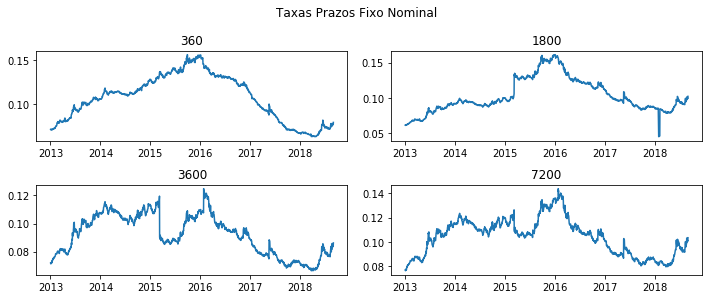

In [347]:
fig = plt.figure(2, figsize=(10, 8))
for key, pz in enumerate(dfNominalFixo.columns):
    ax = plt.subplot(len(dfNominalFixo.columns), 2, key + 1)
    ax.plot(dfNominalFixo[dfNominalFixo.columns[key]])
    ax.set_title(pz)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Taxas Prazos Fixo Nominal')
plt.show()


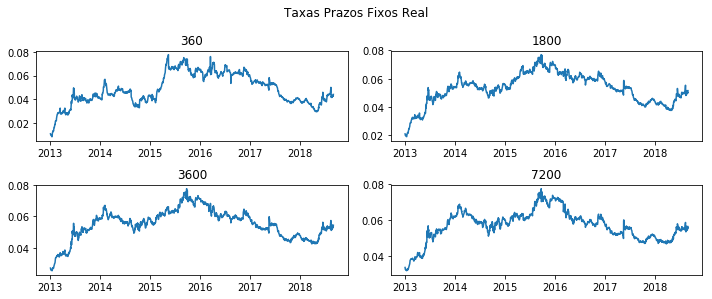

In [348]:
fig = plt.figure(2, figsize=(10, 8))
for key, pz in enumerate(dfRealFixo.columns):
    ax = plt.subplot(len(dfRealFixo.columns), 2, key + 1)
    ax.plot(dfRealFixo[dfReal.columns[key]])
    ax.set_title(pz)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Taxas Prazos Fixos Real')
plt.show()

# Analisando as taxas originais

In [259]:
# O primeiro passo é consolidar todas as taxas nominais tratadas em um único df (dfNominal)

list_ = []

for filename in os.listdir(INPUT_PATH_NOMINAL):
    if "Original" in filename:
        list_.append(pd.read_csv(INPUT_PATH_NOMINAL + filename, index_col='Dia'))

dfNominalOriginal = pd.concat(list_, sort=False)
dfNominalOriginal.index = pd.to_datetime(dfNominalOriginal.index)

# Agora importo todas as taxas reais num único df (dfReal)

list_ = []

for filename in os.listdir(INPUT_PATH_REAL):
    if "Original" in filename:
        list_.append(pd.read_csv(INPUT_PATH_REAL + filename, index_col='Dia'))

dfRealOriginal = pd.concat(list_, sort=False)
dfRealOriginal.index = pd.to_datetime(dfRealOriginal.index)

In [265]:
dfNominalOriginal.describe()


,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2021-01-01,2019-01-01,2023-01-01,2020-01-01,2025-01-01
count,249.000000,504.000000,754.000000,996.000000,981.000000,867.000000,646.000000,646.000000,386.000000,142.000000
mean,0.086470,0.103557,0.119121,0.125575,0.118039,0.113501,0.094192,0.109700,0.084622,0.104303
std,0.008132,0.012330,0.018097,0.016484,0.022864,0.023350,0.026147,0.015746,0.009070,0.008954
min,0.070899,0.077123,0.081334,0.084783,0.049835,0.078159,0.061090,0.088212,0.068395,0.092798
25%,0.079366,0.097033,0.110867,0.115653,0.111532,0.092126,0.068057,0.098591,0.079205,0.095576
50%,0.089230,0.107967,0.118541,0.126755,0.122938,0.112712,0.092354,0.105215,0.082730,0.104370
75%,0.093664,0.111420,0.133298,0.136524,0.128615,0.126483,0.118149,0.118855,0.093296,0.112063
max,0.099853,0.171757,0.210463,0.166254,0.163139,0.164382,0.159721,0.163223,0.108534,0.121026


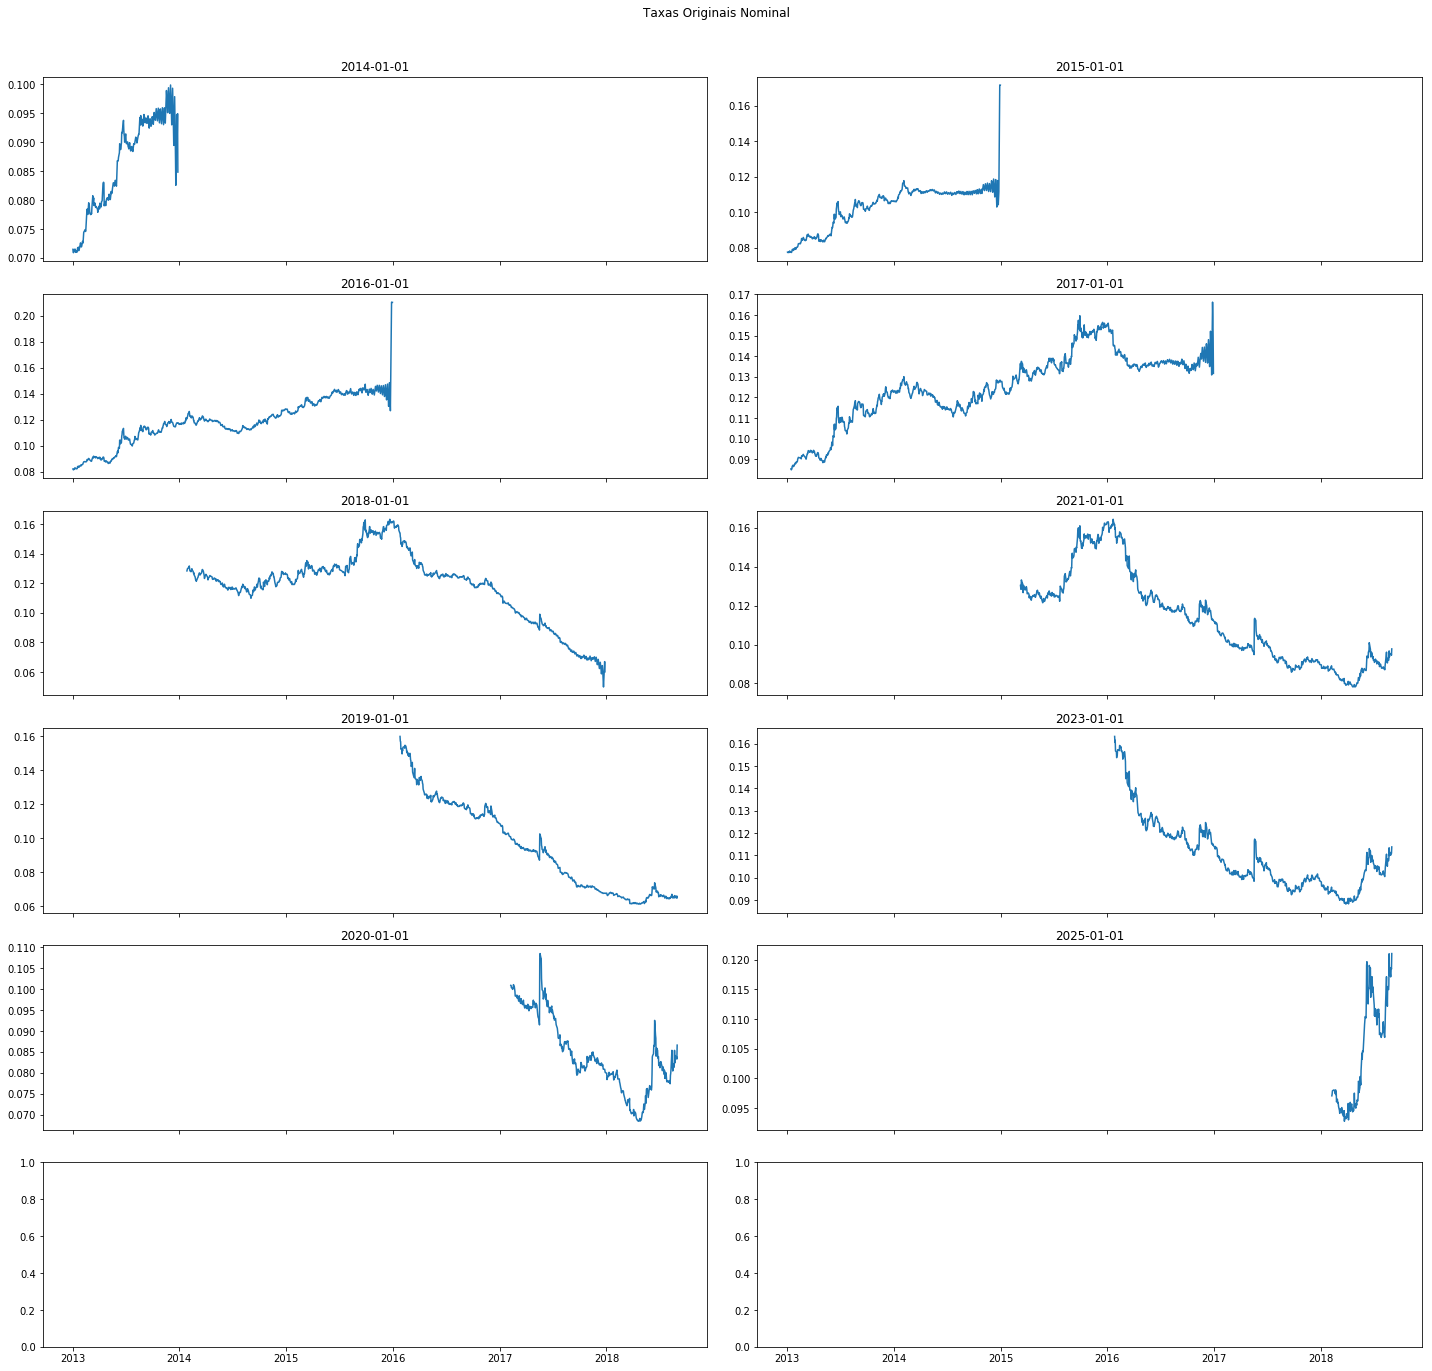

In [346]:
fig, axs = plt.subplots(int(len(dfNominalOriginal.columns)/2) + 1, 2, sharex=True, figsize=(20, 20))
axs = axs.flatten()
for key, pz in enumerate(dfNominalOriginal.columns):
        axs[key].plot(dfNominalOriginal[dfNominalOriginal.columns[key]])
        axs[key].set_title(pz)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Taxas Vcto Fixo Nominal')
plt.show()


In [266]:
dfRealOriginal.describe()

,2013-05-15,2015-05-15,2017-05-15,2020-08-15,2024-08-15,2035-05-15,2045-05-15,2050-08-15,2026-08-15
count,90.000000,594.000000,1093.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,646.000000
mean,0.008499,0.053819,0.057557,0.054208,0.057159,0.058490,0.059166,0.058905,0.055805
std,0.032186,0.323917,0.012881,0.011160,0.008586,0.007652,0.007297,0.007098,0.006029
min,-0.235048,-0.012635,0.023188,0.029440,0.034553,0.038245,0.038934,0.039382,0.045850
25%,0.001545,0.027034,0.051839,0.043681,0.052154,0.053480,0.054605,0.054355,0.051164
50%,0.014792,0.038875,0.058475,0.057590,0.057875,0.058271,0.058882,0.058891,0.056032
75%,0.021927,0.044287,0.064084,0.061938,0.062353,0.062658,0.063089,0.063022,0.059490
max,0.033571,7.601975,0.174469,0.078555,0.078504,0.077328,0.076332,0.076105,0.074426


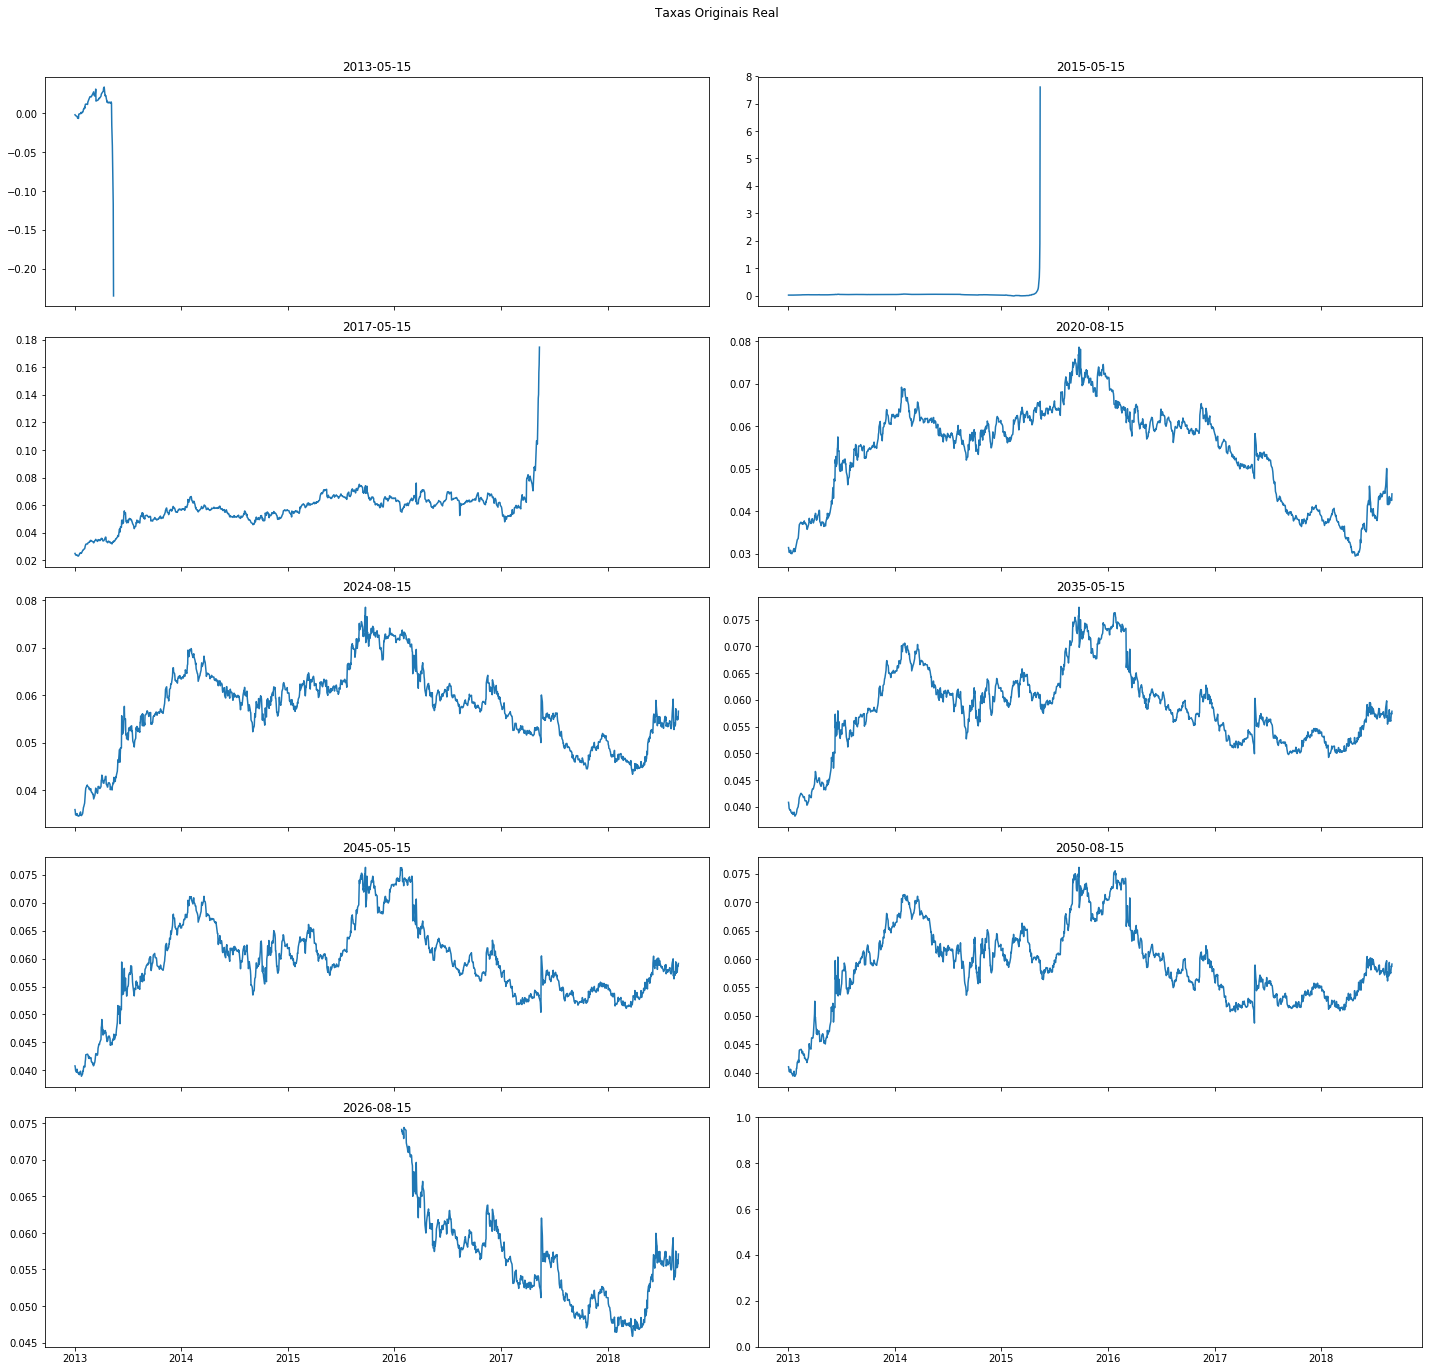

In [342]:
fig, axs = plt.subplots(int(len(dfRealOriginal.columns)/2) + 1, 2, sharex=True, figsize=(20, 20))
axs = axs.flatten()
for key, pz in enumerate(dfRealOriginal.columns):
        axs[key].plot(dfRealOriginal[dfRealOriginal.columns[key]])
        axs[key].set_title(pz)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Taxas Vcto Fixo Real')
plt.show()

# Calculo dos componentes principais via PCA

A proposta do trabalho é calcular a forward rate com base nas taxas de vencimento fixo (parametrização de musiela). Por esse motivo, essa parte do trabalho apenas o df 'dfNominalFixo'

'explained_variance_ratio' contem o % explicado por cada uma das componentes <br>
'components_' são os autovetores <br>
'explained_variance' são os autovalores

In [367]:
from sklearn.decomposition import PCA

## Taxas Nominais

In [445]:
# Cálculo das diferenças
dfDiff = dfNominalFixo.diff().dropna()
dfDiff.shape

# Cálculo da Matrix de Covariância de média 0 e variância 1
n_samples = dfDiff.shape[0]
dfDiffNormCenter = dfDiff - np.mean(dfDiff, axis =0)
# covMatrix = np.dot(dfDiffNormCenter.T,dfDiffNormCenter) / n_samples

(1415, 3)
[0.63848825 0.30439759 0.04965167]


<BarContainer object of 3 artists>

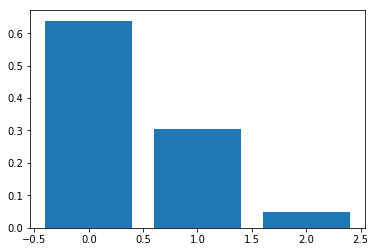

In [446]:
# Escolha da quantidade de componentes desejados
pca3 = PCA(n_components=3)
dfDiffReduzida = pca3.fit_transform(dfDiffNormCenter)

# Redução do Dataframe
print(dfDiffReduzida.shape)

# Variância explicada pelo modelo com certa quantidade de componentes
print(pca3.explained_variance_ratio_)

# Em forma de gráfico, a participação de cada componente
features = range(pca3.n_components_)
plt.bar(features, pca3.explained_variance_ratio_)

In [451]:
# Modelo com n=1 componente
pca1 = PCA(n_components=1)
dfDiffReduzida = pca1.fit_transform(dfDiffNormCenter)

# Redução do Dataframe
print(dfDiffReduzida.shape)

# Variância explicada pelo modelo com certa quantidade de componentes
print(pca1.explained_variance_ratio_.cumsum().max())


(1415, 1)
0.8884953238047477


## Taxas Reais

In [636]:
# Cálculo das diferenças
dfDiff = dfRealFixo.diff().dropna()
dfDiff = dfDiff['2013':'2013']
print(dfDiff.shape)

# Cálculo da Matrix de Covariância de média 0 e variância 1
n_samples = dfDiff.shape[0]
dfDiffNormCenter = dfDiff - np.mean(dfDiff, axis =0)
# dfDiffNormCenter = dfDiff
print(dfDiffNormCenter.shape)

(250, 4)
(250, 4)


### Modelo com n=3 componentes

(250, 3)
0.999375017823912


<BarContainer object of 3 artists>

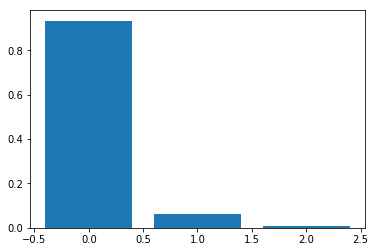

In [637]:
# Escolha da quantidade de componentes desejados
pca3 = PCA(n_components=3)
dfDiffReduzida = pca3.fit_transform(dfDiffNormCenter)

# Redução do Dataframe
print(dfDiffReduzida.shape)

# Variância explicada pelo modelo com certa quantidade de componentes
print(pca3.explained_variance_ratio_.cumsum().max())

# Em forma de gráfico, a participação de cada componente
features = range(pca3.n_components_)
plt.bar(features, pca3.explained_variance_ratio_)

In [638]:
pca3.explained_variance_

array([3.98509774e-06, 2.56177399e-07, 2.59367078e-08])

### Modelo com n=1 componentes

In [450]:
# Modelo com n=1 componente
pca1 = PCA(n_components=1)
dfDiffReduzida = pca1.fit_transform(dfDiffNormCenter)

# Redução do Dataframe
print(dfDiffReduzida.shape)

# Variância explicada pelo modelo com certa quantidade de componentes
print(pca1.explained_variance_ratio_.cumsum().max())


(1415, 1)
0.888495323804748


# Cálculo dos coeficientes da forma da volatilidade

Preciso definir qual será a forma da volatilidade utilizada (3 fatores Laszlo x 1 fator HJM), rodar uma regressão não linear e utilizar tais coeficientes para simular o modelo HJM

In [386]:
from scipy.optimize import least_squares

## Função com 4 coeffs, modelo do Laszlo

In [675]:
# t = prazos, entao preciso confirmar se estao devidamente contabilizados na funcao
# para cada fator, tenho um conjunto de coeficientes diferentes - PRECISA AJUDAR A FUNCAO

def funcVol3(coeffs, t):
    # Funcao para minimizar e encontrar os valores de alpha_i, beta_i, gamma_i, delta_i
    vol = []
    vol = (coeffs[0] + np.dot(coeffs[1],t)) * np.exp(np.dot(coeffs[2],t)) + coeffs[3]
    return vol

def ResidualsVol3(coeffs, y, t):
    return np.ravel(y - funcVol3(coeffs, t))

In [674]:
coeffs = [0.1, 0.1, 0.1, 0.1]
funcVol3(coeffs, t)

array([1.55635459e+017, 2.68238095e+080, 7.98797334e+158])

In [672]:
coeffs = [0.1, 0.1, 0.1, 0.1]
t = list(map(int,list(dfDiff.columns)))[:dfDiffReduzida.shape[1]]
x = least_squares(ResidualsVol3, coeffs, args=(dfDiffReduzida[1], t))
print(x.x)

[0.1 0.1 0.1 0.1]


C:\Users\vantonini\Anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:120: RuntimeWarning: overflow encountered in multiply
  suf = s * uf
C:\Users\vantonini\Anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:143: RuntimeWarning: invalid value encountered in double_scalars
  alpha = max(0.001 * alpha_upper, (alpha_lower * alpha_upper)**0.5)
C:\Users\vantonini\Anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:114: RuntimeWarning: overflow encountered in square
  denom = s**2 + alpha
C:\Users\vantonini\Anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: invalid value encountered in true_divide
  p_norm = norm(suf / denom)
C:\Users\vantonini\Anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:117: RuntimeWarning: overflow encountered in square
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
C:\Users\vantonini\Anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:117: RuntimeWarning: invalid value encountered in true_divide
  p

## Função com 2 coeffs, modelo do HJM

In [666]:
def funcVol2(coeffs, t):
    vol = []
    vol = ((coeffs[0]) * (np.exp(np.dot(-coeffs[1],t)) - 1)**(2)) / (coeffs[1] ** 2)
    return vol

def ResidualsVol2(coeffs, y, t):
    return np.ravel(y - funcVol2(coeffs, t))

In [667]:
coeffs = [0.1, 0.1]
t = list(map(int,list(dfDiff.columns)))[:dfDiffReduzida.shape[1]]
x = least_squares(ResidualsVol2, coeffs, args=(dfDiffReduzida, t))
print(x.x)

[-7.10091829e-10  1.52976806e-01]
